# Task 1: Cree una variable dicotómica por cada una de las categorías de la variable respuesta categórica que creó en hojas anteriores. Debería tener 3 variables dicotómicas (valores 0 y 1) una que diga si la vivienda es cara o no, media o no, económica o no.

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.linear_model import LogisticRegression
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_score



In [37]:
# Seleccionar solo las variables numéricas relevantes
datos = pd.read_csv("train.csv", encoding="latin1")
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

numericas = numericas.dropna()


In [39]:
# Crear variable respuesta que clasifica las casas en Económicas, Intermedias o Caras
terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LotFrontage   1195 non-null   float64 
 1   LotArea       1195 non-null   int64   
 2   OverallQual   1195 non-null   int64   
 3   OverallCond   1195 non-null   int64   
 4   YearBuilt     1195 non-null   int64   
 5   YearRemodAdd  1195 non-null   int64   
 6   MasVnrArea    1195 non-null   float64 
 7   BsmtFinSF1    1195 non-null   int64   
 8   BsmtFinSF2    1195 non-null   int64   
 9   BsmtUnfSF     1195 non-null   int64   
 10  TotalBsmtSF   1195 non-null   int64   
 11  1stFlrSF      1195 non-null   int64   
 12  2ndFlrSF      1195 non-null   int64   
 13  LowQualFinSF  1195 non-null   int64   
 14  GrLivArea     1195 non-null   int64   
 15  BsmtFullBath  1195 non-null   int64   
 16  BsmtHalfBath  1195 non-null   int64   
 17  FullBath      1195 non-null   int64   
 18  HalfBath

In [40]:
dummies = pd.get_dummies(numericas['Clase'])
dummies.head()

,Económicas,Intermedias,Caras
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [42]:
datos = pd.concat([numericas,dummies], axis=1)
datos.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,MiscVal,SalePrice,Clase,Económicas,Intermedias,Caras
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,8,2,548,0,0,208500,Caras,0,0,1
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,6,2,460,0,0,181500,Intermedias,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,6,2,608,0,0,223500,Caras,0,0,1
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,7,3,642,0,0,140000,Intermedias,0,1,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,9,3,836,0,0,250000,Caras,0,0,1


In [43]:
economica = datos.pop("Económicas") 
intermedias = datos.pop("Intermedias")
caras = datos.pop("Caras")
datos.pop("Clase")


0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: Clase, Length: 1195, dtype: category
Categories (3, object): ['Económicas' < 'Intermedias' < 'Caras']

# Task 2: Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores

In [58]:

X = datos
y = caras

random.seed(42)



In [59]:

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

Task 3: Elabore un modelo de regresión logística para conocer si una vivienda es cara o no,
utilizando el conjunto de entrenamiento y explique los resultados a los que llega. El
experimento debe ser reproducible por lo que debe fijar que los conjuntos de
entrenamiento y prueba sean los mismos siempre que se ejecute el código. Use validación
cruzada.


In [60]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)



In [62]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar si es cara o no\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('Recall score:', recall)
print('F1 score: ', f1)

Matriz de confusión para detectar si es cara o no
 [[154   2]
 [  1  82]]
Accuracy:  0.9874476987447699
Precision:  0.9874476987447699
Recall score: 0.9874476987447699
F1 score:  0.9874476987447699


In [65]:
k_folds = KFold(n_splits = 5, shuffle=True, random_state=42)

scores = cross_val_score(logReg, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.9874477 0.9958159 0.9916318 0.9958159 0.9916318]
Average CV Score:  0.992468619246862
Number of CV Scores used in Average:  5


Dado que se obtuvo un buen puntaje para la precisión del modelo y además se tuvo un alto porcentaje promedio para el modelo, se puede determinar que este es un modelo bueno para determinar si una casa llegará a ser cara o no. El k_fold más alto  fue el de 2 y el de 4 con un porcentaje de precisión de 0.996 aproximadamente. 

# Task 4: Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan al modelo, por su valor de significación. Haga un análisis de correlación de las variables del modelo y especifique si el modelo se adapta bien a los datos.

Text(0.5, 1.0, 'Correlación de las variables numéricas del dataset')

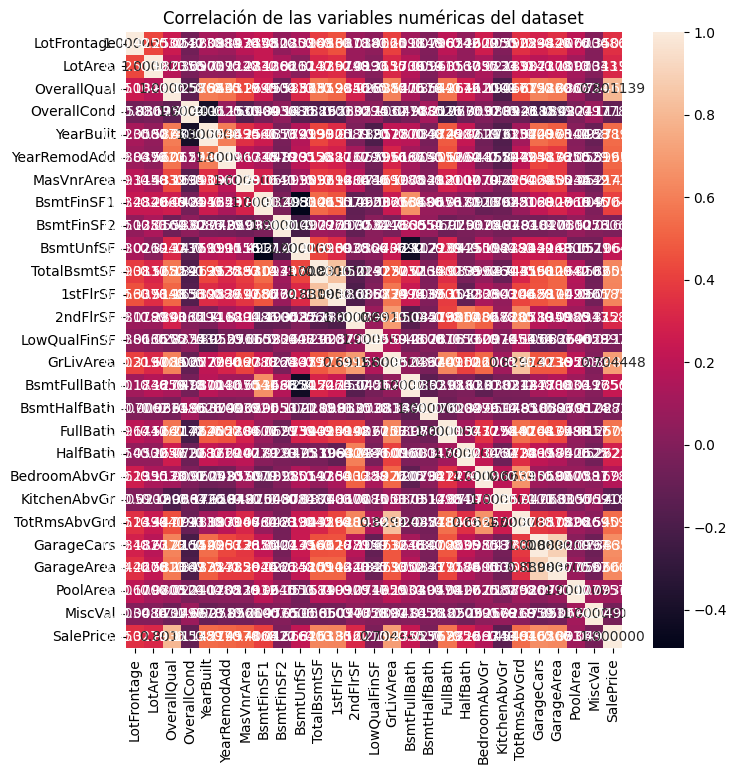

In [73]:
plt.subplots(figsize = (8,8))
sns.heatmap(numericas.corr(),annot=True,fmt="f").set_title("Correlación de las variables numéricas del dataset")

Text(0.5, 1.0, 'Correlación de las variables numéricas del dataset')

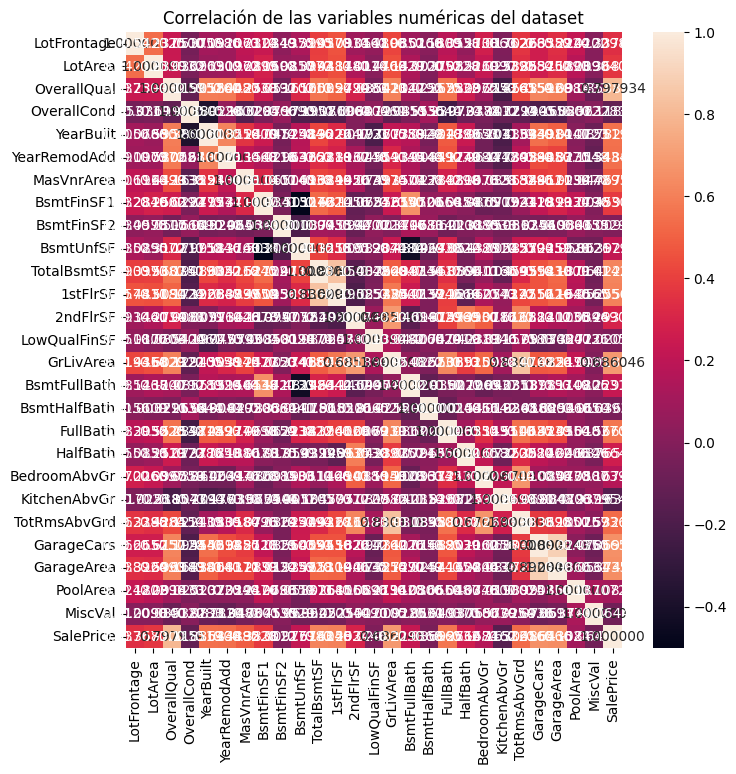

In [74]:
plt.subplots(figsize = (8,8))
sns.heatmap(X_train.corr(),annot=True,fmt="f").set_title("Correlación de las variables numéricas del dataset")

Debido a la gran similitud que se tiene entre las matrices de correlación entre los datos de prueba, de entrenamiento y los generales, se puede determinar qu eel modelo se ajusta bien al set de datos utilizados ya que es casi igual. 